In [16]:
from utils.self_preference_analyzer import Config, AnalyzeDataLoader, PlotUtils, QualitativeEvaluator
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [ ]:
class ModelAnalyzer:
    """Class for model-based analysis and visualization."""
    
    def __init__(self, config: Config, plot_utils: PlotUtils):
        self.config = config
        self.plot_utils = plot_utils
    
    def plot_wins_by_model(self, df: pd.DataFrame, experiment_type: str = "all") -> None:
        """Plot overall performance comparison across models."""
        # Filter and group data
        if experiment_type == "all":
            grouped_df = df.groupby('model')[self.config.WIN_TYPES].sum()
        else:
            filtered_df = df[df['experiment'] == experiment_type]
            grouped_df = filtered_df.groupby('model')[self.config.WIN_TYPES].sum()
        
        # Calculate percentages and sort by conceptual relevance
        grouped_df = self.plot_utils.calculate_percentages(grouped_df, self.config.WIN_TYPES)
        grouped_df = grouped_df.sort_values('Conceptual Relevant Wins_percentage', ascending=False)
        
        # Create plot with larger font sizes
        plt.rcParams.update({'font.size': 16})
        fig, ax = plt.subplots(figsize=(20, 10))
        bars = self.plot_utils.setup_stacked_bar_plot(
            ax, grouped_df,
            f'Percentage of Wins by Embedding Models ({experiment_type})',
            'Model', self.config.WIN_TYPES, self.config.BAR_WIDTH,
        )
        
        # Set title with larger font
        ax.set_title(f'Percentage of Wins by Embedding Models ({experiment_type})', fontsize=30)
        ax.set_xlabel('Model', fontsize=25)
        ax.set_ylabel('Percentage', fontsize=25)
        
        # Rotate x-axis labels to 45 degrees with larger font
        ax.set_xticklabels(grouped_df.index, rotation=45, fontsize=20, ha='right')
        ax.tick_params(axis='y', labelsize=20)
        
        # # Add data labels with larger font size
        # for container in ax.containers:
        #     ax.bar_label(container, fmt='%.1f%%', fontsize=16, fontweight='bold', 
        #                 label_type='center', color='white')
        
        # Increase legend font size
        legend = ax.legend(fontsize=18, title_fontsize=20)
        if legend:
            legend.get_title().set_fontsize(20)
        
        plt.tight_layout()
        plt.show()

In [22]:
config = Config()
plot_utils = PlotUtils()
model_analyzer = ModelAnalyzer(config, plot_utils)

In [23]:
# Initialize data loader
data_loader = AnalyzeDataLoader(config)
dataframes = data_loader.prepare_data()

# Extract individual dataframes for easier access
overall_df = dataframes['overall']

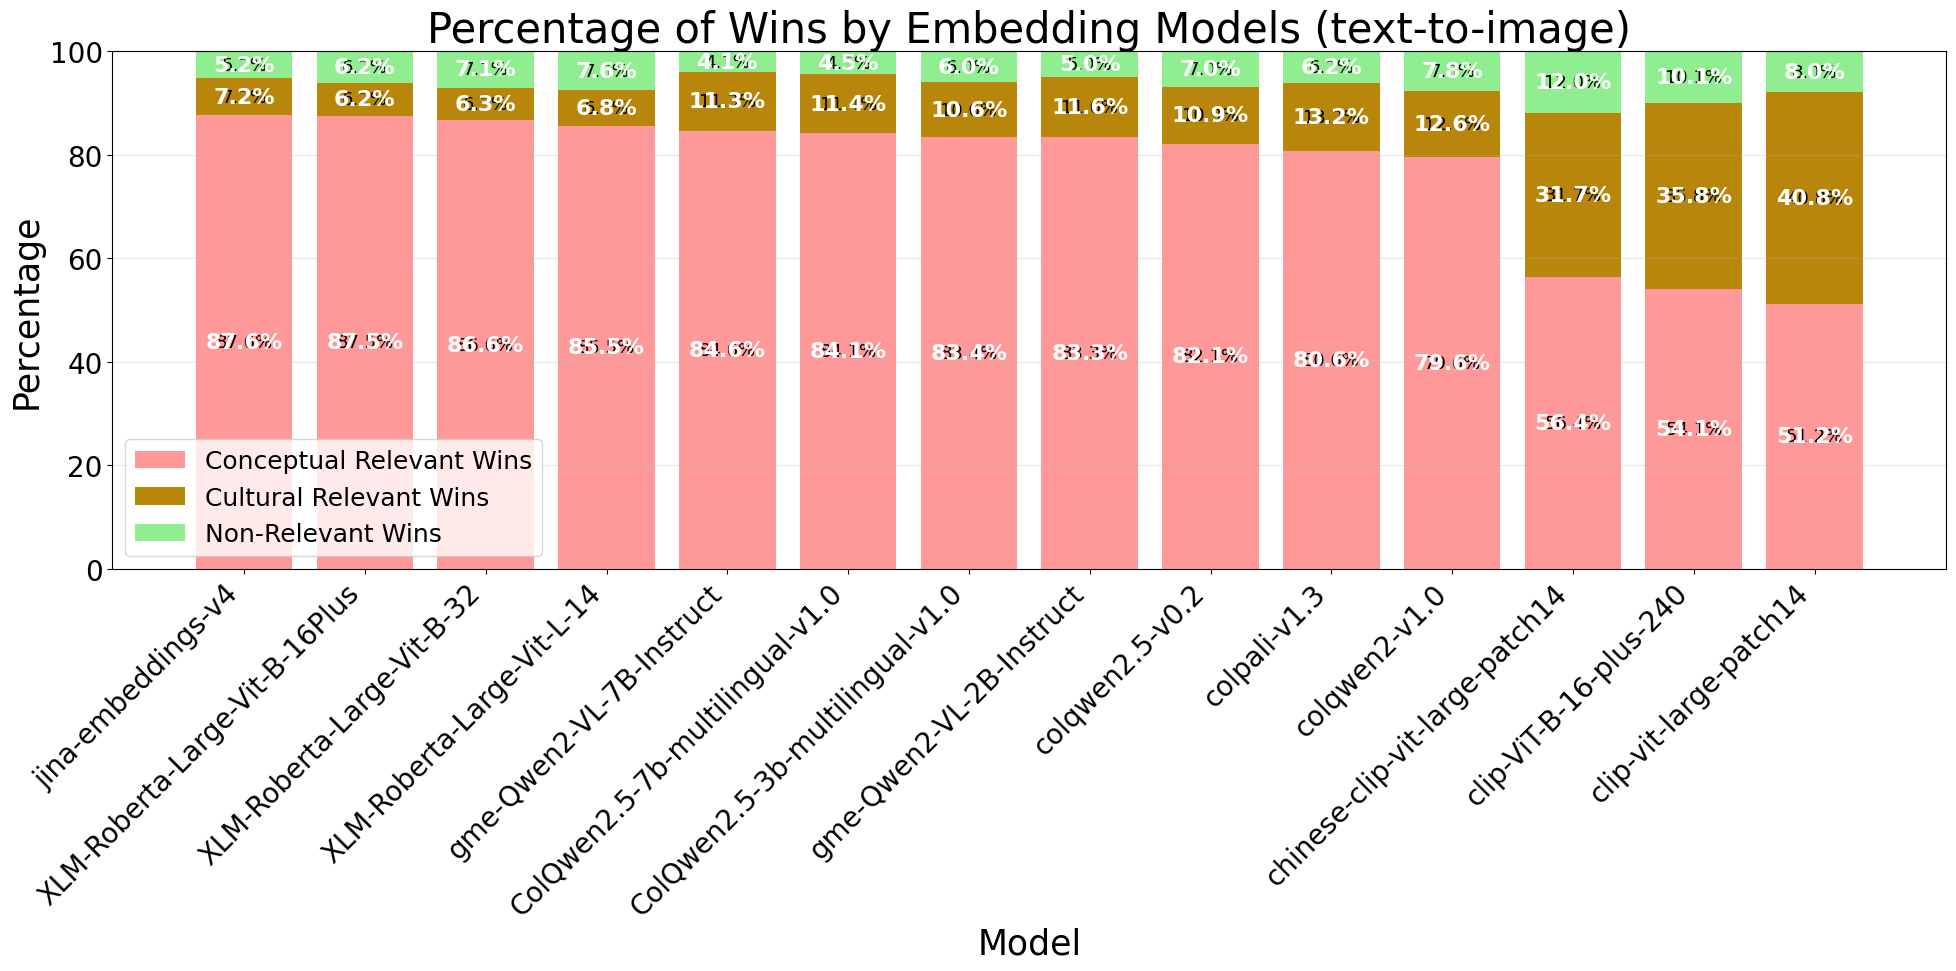

In [24]:
model_analyzer.plot_wins_by_model(overall_df, "text-to-image")